In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib
import astropy.units as u
import astropy.coordinates as coord
from astroquery.vizier import Vizier
%matplotlib inline
from astropy.io import fits
from astroquery.simbad import Simbad
import matplotlib
import aplpy
from astroquery.sdss import SDSS
from astroquery.skyview import SkyView
from astropy.coordinates import Angle
import time
from astropy.table import Table
import heapq
from math import log10, floor
import matplotlib.mlab as mlab

/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/sdss/__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


In [2]:
#Region of Sky:

RA=196.875
DE=51.0
RA_length=35.625
DE_length=6.0

#Catalogues:

First_Catalogue_Name='LOTSS'
Second_Catalogue_Name='TGSS'

In [3]:
#Name of Flux in Catalogue..

First_Flux='FTot'
Second_Flux='Stotal'

#And their error
First_Flux_error='e_'+First_Flux
Second_Flux_error='e_'+Second_Flux

In [5]:
#Retrieving first catalogue data:
First_Catalogue_Data= Table.read('data/'+First_Catalogue_Name+'.fit', format='fits')

#Retrieving second catalogue data:
Second_Catalogue_Data= Table.read('data/'+Second_Catalogue_Name+'.fit', format='fits')

In [6]:
#Making array for first catalogue in region of the sky chosen 

n=0
RA_First=[]
DE_First=[]
Lum_First=[]
RA_First_e=[]
DE_First_e=[]
Lum_First_e=[]
while n< len(First_Catalogue_Data):
    if RA-RA_length<First_Catalogue_Data["RAJ2000"][n] and First_Catalogue_Data["RAJ2000"][n]<RA+RA_length and DE-DE_length<First_Catalogue_Data["DEJ2000"][n] and First_Catalogue_Data["DEJ2000"][n]<DE+DE_length:
        RA_First.append(First_Catalogue_Data["RAJ2000"][n])
        DE_First.append(First_Catalogue_Data["DEJ2000"][n])
        Lum_First.append(First_Catalogue_Data[First_Flux][n]/1000)
        RA_First_e.append(First_Catalogue_Data["e_RAdegtot"][n]/3600)
        DE_First_e.append(First_Catalogue_Data["e_DEdegtot"][n]/3600)
        Lum_First_e.append(First_Catalogue_Data[First_Flux_error][n]/1000)
    n=n+1

#Making array for second catalogue in region of the sky chosen  
    
n=0
RA_Second=[]
DE_Second=[]
Lum_Second=[]
RA_Second_e=[]
DE_Second_e=[]
Lum_Second_e=[]
while n< len(Second_Catalogue_Data):
    if RA-RA_length<Second_Catalogue_Data["RAJ2000"][n] and Second_Catalogue_Data["RAJ2000"][n]<RA+RA_length and DE-DE_length<Second_Catalogue_Data["DEJ2000"][n] and Second_Catalogue_Data["DEJ2000"][n]<DE+DE_length:
        RA_Second.append(Second_Catalogue_Data["RAJ2000"][n])
        DE_Second.append(Second_Catalogue_Data["DEJ2000"][n])
        Lum_Second.append(Second_Catalogue_Data[Second_Flux][n]/1000)
        RA_Second_e.append(Second_Catalogue_Data["e_RAJ2000"][n]/3600)
        DE_Second_e.append(Second_Catalogue_Data["e_DEJ2000"][n]/3600)
        Lum_Second_e.append(Second_Catalogue_Data[Second_Flux_error][n]/1000)
    n=n+1


/Users/niallbradley/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


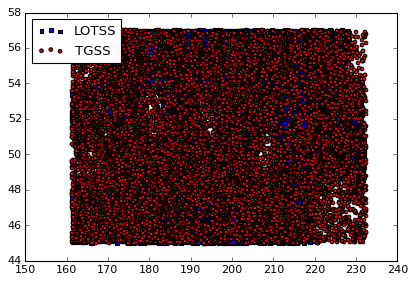

In [7]:
#Plotting coords of two arrays to compare

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(RA_First, DE_First, s=10, c='b', marker="s", label=First_Catalogue_Name)
ax1.scatter(RA_Second,DE_Second, s=10, c='r', marker="o", label=Second_Catalogue_Name)
plt.legend(loc='upper left');
plt.show()

In [8]:
start_time = time.time()
#This loop finds common stars between catalogues:

#Creating new arrays:

#Luminosities of stars in common(and error)
Lum_First_Relevant=[]
Lum_Second_Relevant=[]
Lum_First_Relevant_e=[]
Lum_Second_Relevant_e=[]

#Coordinates of stars in common(and error)
RA_First_Relevant=[]
RA_Second_Relevant=[]
DE_First_Relevant=[]
DE_Second_Relevant=[]
RA_First_Relevant_e=[]
RA_Second_Relevant_e=[]
DE_First_Relevant_e=[]
DE_Second_Relevant_e=[]

#Creating new variables

#index for first catalogue:
f=0
#index for second catalogue:
s=0
#number of iterations:
it=0
#Number of stars in both catalogues
corr=1

#While loop goes through all of first catalogue..
while f<len(RA_First):
    #If it compares a source in first catalogue to every source in second without finding one in common then..
    if s==len(RA_Second):
        #It moves on to next source in first and..
        f=f+1
        #Starts comparing it to the first source in the second catalogue
        s=0
    #This is a formula for overlapping rectangles with the sides being the error
    #If this is true catalogues have that source in common
    elif RA_First_e[f]+RA_Second_e[s]>= abs(RA_First[f]-RA_Second[s]) and DE_First_e[f]+DE_Second_e[s]>= abs(DE_First[f]-DE_Second[s]):
        #Making arrays of flux of sources in common (and error)
        Lum_First_Relevant.append((Lum_First[f]))
        Lum_Second_Relevant.append(Lum_Second[s])
        Lum_First_Relevant_e.append((Lum_First_e[f]))
        Lum_Second_Relevant_e.append(Lum_Second_e[s])
        
        #Making arrays of coordinates of sources in common 
        RA_First_Relevant.append(RA_First[f])
        RA_Second_Relevant.append(RA_Second[s])
        RA_First_Relevant_e.append(RA_First_e[f])
        RA_Second_Relevant_e.append(RA_Second_e[s])
        DE_First_Relevant.append(DE_First[f])
        DE_Second_Relevant.append(DE_Second[s])
        DE_First_Relevant_e.append(DE_First_e[f])
        DE_Second_Relevant_e.append(DE_Second_e[s])
        
        #Number of common sources increased
        corr=corr+1
        #Move onto next source in first catalogue
        f=f+1
        #Starts comparing it to the first source in the second catalogue
        s=0
    #If neither of these are true then..
    else:
        #Try next source in second catalogue
        s=s+1
    #Before going onto next loop increase number of iterations
    it=it+1
print("--- %s seconds ---" % (time.time() - start_time))

--- 375.430721998 seconds ---


In [9]:
print "Number of iterations:",it
print "Number of stars corrolated:",corr

Number of iterations: 398647014
Number of stars corrolated: 7373


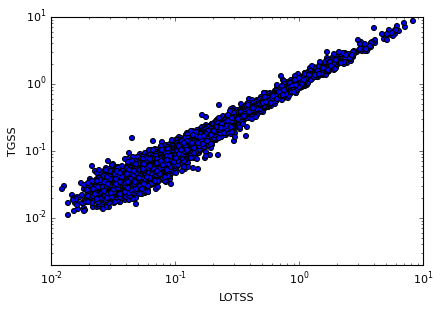

In [10]:
#Plotting Luminosities (unit Jy, log scale)

if corr>0:
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(Lum_First_Relevant, Lum_Second_Relevant)
    plt.xlabel(First_Catalogue_Name)
    plt.ylabel(Second_Catalogue_Name)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(0.01,10)
    plt.ylim(0,10)
    plt.show()

In [11]:
#Defining new variables
Fractional_Diff=0
n=0
m=0
Fractional_Diff_list=[]

#This loop goes through the whole lists of common sources

while n<corr-1:
    
    #Calculates nth fractional change
    Fractional_Diff=(abs(Lum_First_Relevant[n]-Lum_Second_Relevant[n]))/Lum_First_Relevant[n]
    #Creates an array of fractional changes
    Fractional_Diff_list.append(Fractional_Diff)
    n=n+1

#When loop is finished it will have found the biggest change in the list

0.0843640722445
0.0931777264278


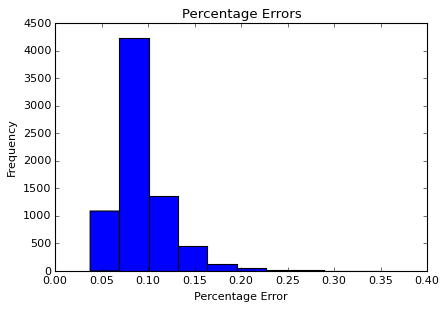

In [26]:
#Some simple statistical analyses on the code:

#Creat new array and variable
total_percentage_errors_list=[]
n=0

#This loop goes through the list of fractional changes and..
while n<len(Fractional_Diff_list):
    
    #..calculates the error on these changes before..
    error_first=(Lum_First_Relevant_e[n]/Lum_First_Relevant[n])
    total_percentage_error=error_first+((Lum_Second_Relevant_e[n]+Lum_First_Relevant_e[n])/(Lum_First_Relevant[n]+Lum_Second_Relevant[n]))
    
    #..adding them to the new list.
    total_percentage_errors_list.append(total_percentage_error)
    
    n=n+1

#Plotting the errors in a histogram
plt.hist(total_percentage_errors_list)
plt.title("Percentage Errors")
plt.xlabel("Percentage Error")
plt.ylabel("Frequency")
fig = plt.gcf()

#Calculating the mean and the median:
mean=np.mean(total_percentage_errors_list)
med= np.median(total_percentage_errors_list)
print med
print mean

In [14]:
#FIRST ATTEMPT

#Number of sources with largest changes in flux you want:
size=10

#This function rounds a number to one significant figure and will be used later
def round_to_1(x):
    return round(x, -int(floor(log10(abs(x)))))

#Create a list of the largest 'size' fractional changes in flux:
Largest_Fractional_Diffs=heapq.nlargest(size,Fractional_Diff_list)

#Set new lists:
Big_Change_indexes=[]
Big_Change_RAs=[]
Big_Change_DEs=[]
n=0

#This loop goes through the "Largest_Fractional_Diffs" list and...
while n<size:
    
    #..creates lists of their indexes and coordinates...
    ind= Fractional_Diff_list.index(Largest_Fractional_Diffs[n])
    Big_Change_indexes.append(ind)
    Big_Change_RAs.append(RA_First_Relevant[ind])
    Big_Change_DEs.append(DE_First_Relevant[ind])
    
    #..then calculates the errors relating to each change
    error_first=(Lum_First_Relevant_e[ind]/Lum_First_Relevant[ind])
    error_second=(Lum_Second_Relevant_e[ind]/Lum_Second_Relevant[ind])
    total_percentage_error=error_first+((Lum_Second_Relevant_e[ind]+Lum_First_Relevant_e[ind])/(Lum_First_Relevant[ind]+Lum_Second_Relevant[ind]))
    total_error=round_to_1(total_percentage_error*Largest_Fractional_Diffs[n])
    
    #printing relevant information:
    print n,":"
    print "Change in flux:",Largest_Fractional_Diffs[n],"±",total_error
    print "Respective fluxes:",Lum_First_Relevant[ind],Lum_Second_Relevant[ind]
    print "Coordinates:",Big_Change_RAs[n],Big_Change_DEs[n]
    print "Total percentage error:",round_to_1(total_percentage_error)
    
    #This finds all the objects on Simbad within 10" of the relevant source
    Simbad_table=Simbad.query_region(coord.SkyCoord(Big_Change_RAs[n], Big_Change_DEs[n],unit=(u.deg, u.deg)),radius='0d0m10s')
    
    #If no source is found on Simbad then..
    if not Simbad_table:
            #..print this:
            print "==>no source found on SIMBAD"
    #If there is source(s) found then...
    else:
        #print relevant information from Simbad
        print Simbad_table["MAIN_ID","RA","DEC"]
    
    print ""
    print ""
    print ""
    n=n+1


0 :
Change in flux: 2.53010156831 ± 0.3
Respective fluxes: 0.04461628 0.1575
Coordinates: 203.036 47.11892
Total percentage error: 0.1


/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:32:08.64 +47:07:08.112': No astronomical object found :
  (error.line, error.msg))


==>no source found on SIMBAD



1 :
Change in flux: 1.71487944864 ± 0.3
Respective fluxes: 0.02147425 0.0583
Coordinates: 217.38867 47.25709
Total percentage error: 0.2
==>no source found on SIMBAD



2 :
Change in flux: 1.41386324135 ± 0.2
Respective fluxes: 0.02895773 0.0699
Coordinates: 206.76624 46.42481
Total percentage error: 0.1
==>no source found on SIMBAD



3 :
Change in flux: 1.38031032604 ± 0.3
Respective fluxes: 0.01264541 0.0301
Coordinates: 172.18192 47.14743
Total percentage error: 0.2
==>no source found on SIMBAD



4 :
Change in flux: 1.20353437537 ± 0.1
Respective fluxes: 0.04265874 0.094
Coordinates: 229.18089 48.48004
Total percentage error: 0.1
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J151643+482848 15 16 43.20 +48 28 48.0



5 :
Change in flux: 1.20242957567 ± 0.3
Respective fluxes: 0.01216838 0.0268
Coordinates: 217.93641 46.41554
Total percentage error: 0.2


/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '14:29:33.2808 +47:15:25.524': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '13:47:03.8976 +46:25:29.316': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '11:28:43.6608 +47:08:50.748': No astronomical object found :
  (error.line, error.msg))


      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J143144+462457 14 31 44.51 +46 24 57.1



6 :
Change in flux: 1.19419421562 ± 0.3
Respective fluxes: 0.02242281 0.0492
Coordinates: 177.36783 46.36439
Total percentage error: 0.2
==>no source found on SIMBAD



7 :
Change in flux: 1.14764361292 ± 0.3
Respective fluxes: 0.22438546 0.4819
Coordinates: 163.93772 45.40041
Total percentage error: 0.2
      MAIN_ID            RA          DEC     
                      "h:m:s"      "d:m:s"   
------------------- ------------ ------------
NVSS J105545+452401 10 55 44.993 +45 24 01.10



8 :
Change in flux: 1.11716699899 ± 0.2
Respective fluxes: 0.02418326 0.0512
Coordinates: 172.7765 55.3134
Total percentage error: 0.2
==>no source found on SIMBAD



9 :
Change in flux: 1.10524212857 ± 0.1
Respective fluxes: 0.06607316 0.1391
Coordinates: 193.77652 46.69134
Total percentage error: 0.1
      MAIN_ID           

/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '11:49:28.2792 +46:21:51.804': No astronomical object found :
  (error.line, error.msg))
/Users/niallbradley/anaconda/lib/python2.7/site-packages/astroquery/simbad/core.py:136: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): '11:31:06.36 +55:18:48.24': No astronomical object found :
  (error.line, error.msg))


In [27]:
#SECOND ATTEMPT
size=50

#Create a list of the  fractional changes in flux from largest to smallest:
Largest_Fractional_Diffs=sorted(Fractional_Diff_list,reverse=True)

#Creat new lists:
Big_Change_indexes=[]
Big_Change_RAs=[]
Big_Change_DEs=[]

#Creat new variables:
n=0
m=0

#This loop goes through the "Largest_Fractional_Diffs" list and...
while m<size:
    
    #If this loop runs through through the whole list of fractional changes 
    #before getting the specified number of results then..
    if n>=len(Largest_Fractional_Diffs):
        #...print this and stop the loop
        print "No other sources meet criterea"
        break
    
    #If it hasn't run through list then it finds indexes..
    ind= Fractional_Diff_list.index(Largest_Fractional_Diffs[n])
    
     #..then calculates the errors relating to each change
    error_first=(Lum_First_Relevant_e[ind]/Lum_First_Relevant[ind])
    error_second=(Lum_Second_Relevant_e[ind]/Lum_Second_Relevant[ind])
    total_percentage_error=error_first+((Lum_Second_Relevant_e[ind]+Lum_First_Relevant_e[ind])/(Lum_First_Relevant[ind]+Lum_Second_Relevant[ind]))
    total_error=round_to_1(total_percentage_error*Largest_Fractional_Diffs[n])
    
    #This finds all the objects on Simbad within 10" of the relevant source
    Simbad_table=Simbad.query_region(coord.SkyCoord(RA_First_Relevant[ind], DE_First_Relevant[ind],unit=(u.deg, u.deg)),radius='0d0m10s')
    
    #This loop only prints information if it can be found on Simbad:
    if  Simbad_table:
        
        #Creates lists of their indexes and coordinates...
        Big_Change_indexes.append(ind)
        Big_Change_RAs.append(RA_First_Relevant[ind])
        Big_Change_DEs.append(DE_First_Relevant[ind])
        
        #printing relevant information:
        print m,":"
        print "Change in flux:",Largest_Fractional_Diffs[n],"±",total_error
        print "Respective fluxes:",Lum_First_Relevant[ind],Lum_Second_Relevant[ind]
        print "Coordinates:",RA_First_Relevant[ind],DE_First_Relevant[ind]
        print "Total percentage error:",round_to_1(total_percentage_error)
        print Simbad_table["MAIN_ID","RA","DEC"]
        print ""
        print ""
        print ""
        m=m+1
    n=n+1


0 :
Change in flux: 1.20353437537 ± 0.1
Respective fluxes: 0.04265874 0.094
Coordinates: 229.18089 48.48004
Total percentage error: 0.1
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J151643+482848 15 16 43.20 +48 28 48.0



1 :
Change in flux: 1.20242957567 ± 0.3
Respective fluxes: 0.01216838 0.0268
Coordinates: 217.93641 46.41554
Total percentage error: 0.2
      MAIN_ID            RA         DEC    
                      "h:m:s"     "d:m:s"  
------------------- ----------- -----------
NVSS J143144+462457 14 31 44.51 +46 24 57.1



2 :
Change in flux: 1.14764361292 ± 0.3
Respective fluxes: 0.22438546 0.4819
Coordinates: 163.93772 45.40041
Total percentage error: 0.2
      MAIN_ID            RA          DEC     
                      "h:m:s"      "d:m:s"   
------------------- ------------ ------------
NVSS J105545+452401 10 55 44.993 +45 24 01.10



3 :
Change in flux: 1.10524212857 ± 0.1
Respe

In [28]:
#THIRD ATTEMPT

size=20

#Create a list of the largest fractional changes in flux:
Largest_Fractional_Diffs=sorted(Fractional_Diff_list,reverse=True)

#Creat new lists:
Big_Change_indexes=[]
Big_Change_RAs=[]
Big_Change_DEs=[]

#Creat new variables:
n=0
m=0

#This loop goes through the "Largest_Fractional_Diffs" list and...
while m<size:
    
    #If this loop runs through through the whole list of fractional changes 
    #before getting the specified number of results then..
    if n>=len(Largest_Fractional_Diffs):
        print "No other sources meet criterea"
        break
    
    #If it hasn't run through list then it finds indexes..
    ind= Fractional_Diff_list.index(Largest_Fractional_Diffs[n])
 
     #..then calculates the errors relating to each change
    error_first=(Lum_First_Relevant_e[ind]/Lum_First_Relevant[ind])
    error_second=(Lum_Second_Relevant_e[ind]/Lum_Second_Relevant[ind])
    total_percentage_error=error_first+((Lum_Second_Relevant_e[ind]+Lum_First_Relevant_e[ind])/(Lum_First_Relevant[ind]+Lum_Second_Relevant[ind]))
    total_error=round_to_1(total_percentage_error*Largest_Fractional_Diffs[n])
    
     #This finds all the objects on Simbad within 10" of the relevant source
    Simbad_table=Simbad.query_region(coord.SkyCoord(RA_First_Relevant[ind], DE_First_Relevant[ind],unit=(u.deg, u.deg)),radius='0d0m10s')
    
    #This loop only prints information if the percentage error on the data is below a certain threshold
    if  total_percentage_error<=0.1:
    
        #Creates lists of their indexes and coordinates...
        Big_Change_indexes.append(ind)
        Big_Change_RAs.append(RA_First_Relevant[ind])
        Big_Change_DEs.append(DE_First_Relevant[ind])
        
        #printing relevant information:
        print m,":"
        print "Change in flux:",Largest_Fractional_Diffs[n],"±",total_error
        print "Respective fluxes:",Lum_First_Relevant[ind],Lum_Second_Relevant[ind]
        print "Coordinates:",RA_First_Relevant[ind],DE_First_Relevant[ind]
        print "Total percentage error:",round_to_1(total_percentage_error)
        
        #If no source is found on Simbad then..
        if not Simbad_table:
            #..print this:
            print "==>no source found on SIMBAD"
        #If there is source(s) found then...
        else:
            #print relevant information from Simbad
            print Simbad_table["MAIN_ID","RA","DEC","COO_BIBCODE"]
        
        print ""
        print ""
        print ""
        m=m+1
    n=n+1


0 :
Change in flux: 0.810995328782 ± 0.08
Respective fluxes: 0.041745 0.0756
Coordinates: 196.56695 49.70918
Total percentage error: 0.1
      MAIN_ID            RA         DEC         COO_BIBCODE    
                      "h:m:s"     "d:m:s"                      
------------------- ----------- ----------- -------------------
NVSS J133959+495704 13 39 59.31 +49 57 04.3 2014ApJS..213....3M



1 :
Change in flux: 0.658090030701 ± 0.05
Respective fluxes: 0.09300694 0.0318
Coordinates: 183.68359 54.58016
Total percentage error: 0.07
      MAIN_ID            RA         DEC         COO_BIBCODE    
                      "h:m:s"     "d:m:s"                      
------------------- ----------- ----------- -------------------
NVSS J133959+495704 13 39 59.31 +49 57 04.3 2014ApJS..213....3M



2 :
Change in flux: 0.657098924163 ± 0.06
Respective fluxes: 0.15368864 0.0527
Coordinates: 186.47155 53.15344
Total percentage error: 0.08
      MAIN_ID            RA         DEC         COO_BIBCODE    
 

INFO: Auto-setting vmin to  2.036e+03 [aplpy.core]
INFO: Auto-setting vmax to  1.066e+04 [aplpy.core]


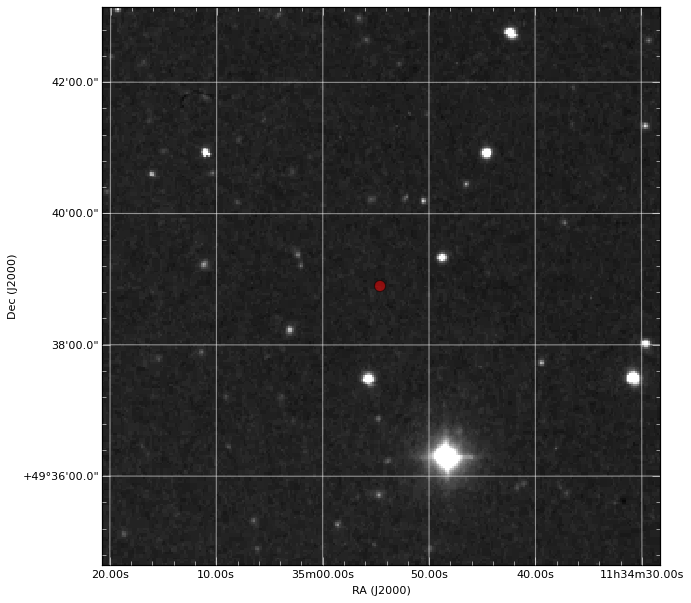

In [24]:
#This displays image of a correlated source

#Which source to show:
x=15

#Coordinates of this star:
pos=coord.SkyCoord(Big_Change_RAs[x]*u.deg, Big_Change_DEs[x]*u.deg)
ra=np.array([Big_Change_RAs[x]])
de=np.array([Big_Change_DEs[x]])
#Find image from DSS:
images = SkyView.get_images(pos,survey=['DSS'])
print images[0]

CV = aplpy.FITSFigure(images[0])


#Gives in grid and makes it grayscale (can also be made colorscale)
CV.show_grayscale()
CV.add_grid()

#This plots a circle where the relevant source should be 
x_pix, y_pix = CV.world2pixel(ra,de)
plt.scatter(x_pix, y_pix, s=100, c='red', alpha=.5)
plt.show()